*Build a Content-Based Image Retrieval System based on a Spirits Data Set*






**Load Packages**

In [2]:
import numpy as np
from numpy.linalg import norm # used for the image feature extraction function, maps vector to a positive value  
import pickle # used to dump and load features and filenames
from tqdm import tqdm, tqdm_notebook # used for progress status bar
import os # used to join paths 
from sklearn.neighbors import NearestNeighbors # used to compute the similarity distance between image features
from keras.preprocessing import image # used for the image feature extraction function
from keras.applications.resnet50 import ResNet50 # used to obtain pre-trained residual network
# from keras.applications import imagenet_utils  
from keras.applications.resnet50 import preprocess_input # ensures that the images have the right format
import matplotlib.pyplot as plt # used to visualize images 
import matplotlib.image as mpimg # used to visualize images
%matplotlib inline

Using TensorFlow backend.


**Load Pre-Trained ResNet50 model**

In [3]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# With further investigation, I could leverage other pre-trained CNN models such as MobileNet, InceptionV3, Xception and determine whether
# these pre-trained models can improve detection and image retrieval

W0819 00:52:06.589073 139747124549504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 00:52:06.633392 139747124549504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 00:52:06.642166 139747124549504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0819 00:52:06.677364 139747124549504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0819 00:52:06.679855

94658560/94653016 [==============================] - 20s 0us/step


**Image Extraction Function:**

*   set image path and model
*   load images
*   resize dimensions to be supported by ResNet50
*   extract features and normalize 






In [0]:
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

**Extract All Image Files and Call Image Extraction Function**


In [5]:

extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list
  
root_dir = '../bibirraClone/referenceImages'
filenames = sorted(get_file_list(root_dir))

feature_list = []

for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

In [6]:
feature_list = np.array(feature_list)

feature_list.shape

(754, 100352)

**Dump and Load Features and Filenames to Pickle Files**

In [0]:
pickle.dump(feature_list, open('features-bottles.pickle', 'wb'))
pickle.dump(filenames, open('filenames-bottles.pickle','wb'))

feature_list = pickle.load(open('features-bottles.pickle', 'rb'))
filenames = pickle.load(open('filenames-bottles.pickle', 'rb'))

**Choose a Similarity Algorithm to Compute the Distance between Vectors**

In [0]:
# there are many algorithms that I could have used for this task such as sklearn's 'brute force' or 'k-d tree' algorithms. Based on my initial research, 
# it looks like 'ball tree' is just as fast as brute force and performs adequately on high dimensional data. With more time, I would investigate 'Annoy', which was
# developed by Spotify and performs much faster that 'ball tree'.

nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(feature_list)
distances, indices = nbrs.kneighbors([feature_list[0]])

***Example Input:***

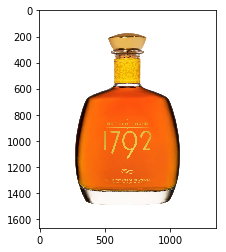

In [9]:
plt.imshow(mpimg.imread(filenames[0]))

***Example Retrieval Output:***

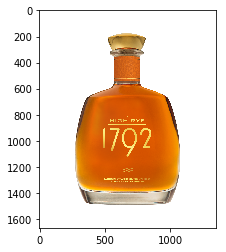

In [10]:
indices = indices.ravel()

plt.imshow(mpimg.imread(filenames[indices[4]]))

In [0]:
# try another example

distances, indices = nbrs.kneighbors([feature_list[6]])

***Example Input:***

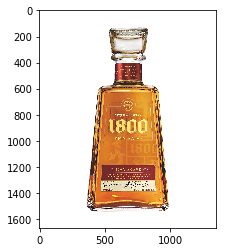

In [12]:
plt.imshow(mpimg.imread(filenames[6]))

***Example Retrieval Output:***

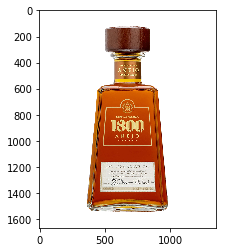

In [13]:
indices = indices.ravel()
plt.imshow(mpimg.imread(filenames[indices[1]]))

**Ideas to Improve CBIR:**

*   Choose a different pre-trained CNN model
*   Choose a different similarity algorithm such as 'Annoy'
*   Experiment with AutoEncoder Image Retrieval
*   Experiment with PCA for dimensionality reduction




